In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import cv2
# Tải dữ liệu MNIST và chia thành tập huấn luyện và tập kiểm tra
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Chuẩn hóa dữ liệu và chuyển đổi nhãn thành one-hot encoding
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


LÀM PHẲNG DỮ LIỆU

In [3]:
train_images = train_images.reshape(60000,784)
test_images = test_images.reshape(10000,784)

TẠO MÔI TRƯỜNG (ENV) VÀ AGENT

In [6]:
class env:
    def __init__(self,train_images,train_labels):
        self.train_images = train_images
        self.train_labels = train_labels
    def penalty(self,predictLable,indexInTrainLable):
        trueLable =  np.argmax( self.train_labels[indexInTrainLable] )
        if predictLable == trueLable:
            penalty = 1
        else: penalty = 100
        return penalty,trueLable
    def action(self,act,index):
        return self.penalty(act,index)
class agent:
    def __init__(self,train_images,train_labels):
        self.train_images = train_images
        self.train_labels = train_labels
        self.learning_rate = 1e-8
        self.env = env(self.train_images,self.train_labels)
        self.w = np.zeros([10,784])# trọng số w
    def predict(self,image,training="No"):
        if training == "Yes":
            w = self.w
        else: w = self.w_max
        min = np.linalg.norm(w[0,:]-image)
        index =0
        for i in range(10):
            min1=np.linalg.norm(w[i,:]-image)
            if min>min1:
                index = i
                min = min1
        return index
    def update_w(self):
        count = 0
        for i in range(self.train_images.shape[0]):
            action = self.predict(self.train_images[i],training="Yes")
            penalty, trueLable = self.env.action(action,i)
            if penalty == 1:
                self.w[action,:] =  self.w[action,:]+self.train_images[i]*self.learning_rate*penalty
                count +=1
            else: 
                self.w[trueLable,:]= self.w[trueLable,:] +  self.train_images[i]*self.learning_rate*penalty
                self.w[action,:]= self.w[action,:] -  self.train_images[i]*self.learning_rate*penalty
                for i in range(10):
                    if i!=trueLable and i !=action:
                        self.w[i,:]= self.w[i,:] -  self.train_images[i]*self.learning_rate*0.001
        return self.w,count
    def train(self):
        accuracy = []
        self.w_max,max_count = self.update_w()
        for i in range(10):
            w ,count = self.update_w()
            accuracy.append((count/60000))
            if max_count<count:
                max_count=count
                self.w_max = w
            elif self.learning_rate>= 1e-10 : self.learning_rate -=0.1*self.learning_rate
        return self.w_max,accuracy


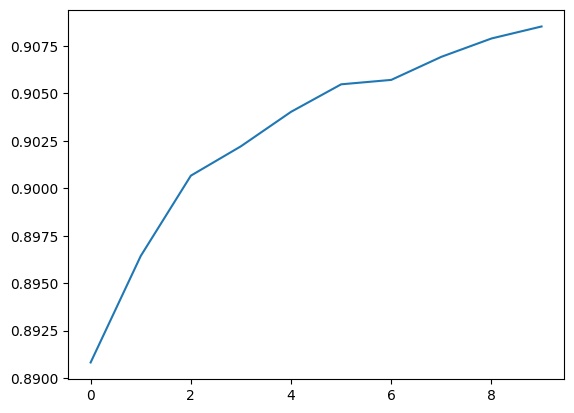

In [7]:
ag = agent(train_images,train_labels)
_,accuracy = ag.train()
plt.plot(accuracy)
plt.show()

Thử nghiệm trên bộ test

predict:  7
true label: 7


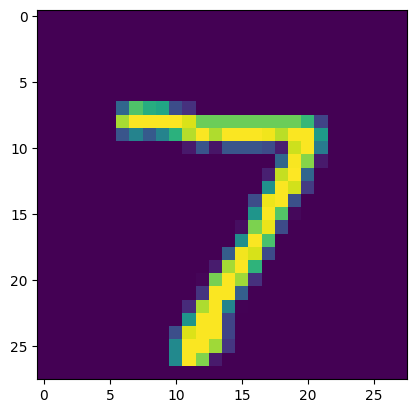

In [13]:
i =0
label = ag.predict(test_images[i])
print("predict: ",label)
print("ground truth:",np.argmax(test_labels[i]))
plt.imshow(test_images[i].reshape(28,28))
plt.show()